In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import warnings; warnings.filterwarnings(action='once')
%matplotlib inline

In [6]:
df_2018 = pd.read_csv("data/FD_MAR_2018.csv", sep=';', low_memory=False)

In [7]:
df_2019 = pd.read_csv("data/FD_MAR_2019.csv", sep=';', low_memory=False)

In [8]:
print(df_2018.shape)
df_2018.head()

(234735, 18)


,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2018,1999,1999,99,01,99,99,1,1,2,2,6,11,N,M,F,NaN,9
1,2018,1987,1987,99,01,70,99,1,1,1,2,6,8,N,M,F,NaN,9
2,2018,1990,1990,99,01,74,01,1,1,1,1,6,7,N,M,F,NaN,9
3,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9
4,2018,1985,1986,99,01,69,99,1,1,1,2,6,12,N,M,F,NaN,9


In [9]:
print(df_2019.shape)
df_2019.head()

(224740, 18)


,AMAR,ANAIS1,ANAIS2,DEPDOM,DEPMAR,DEPNAIS1,DEPNAIS2,ETAMAT1,ETAMAT2,INDNAT1,INDNAT2,JSEMAINE,MMAR,NBENFCOM,SEXE1,SEXE2,TUCOM,TUDOM
0,2019,1979,1979,99,01,99,01,4,4,2,1,6,12,N,M,F,NaN,9
1,2019,1990,1990,99,01,99,30,1,1,2,1,2,12,N,M,F,NaN,9
2,2019,1992,1995,99,01,75,01,1,1,1,1,6,8,N,M,F,NaN,9
3,2019,1982,1989,99,01,99,72,1,1,2,1,6,8,N,M,F,NaN,9
4,2019,1989,1988,99,01,69,01,1,1,1,1,6,6,N,M,F,NaN,9


# Plots

## Plotting number of mariages per month

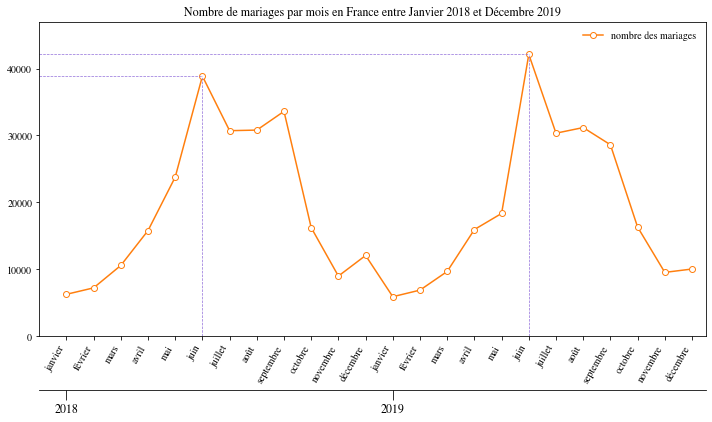

In [10]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

y_2018 = df_2018.groupby(["MMAR"]).count().iloc[:,1]
y_2019 = df_2019.groupby(["MMAR"]).count().iloc[:,1]

months = [
    "janvier",
    "février",
    "mars",
    "avril",
    "mai", "juin",
    "juillet",
    "août",
    "septembre",
    "octobre",
    "novembre",
    "décembre"
]

x = np.append(y_2018.index, y_2019.index+12)
y = np.append(y_2018.values, y_2019.values)

xlabels_1 = months*2
xlabels_2 = [2018, 2019]

fig, ax=plt.subplots(1, 1, figsize=(10, 6))

x_max_val = 24.5
y_max_val = 47000

ax.plot(x, y, color='C1', marker='o', markevery=1, markerfacecolor="white", label="nombre des mariages")

ax.axvline(x=6, ymin=0, ymax=y[5]/y_max_val, linestyle="--", color='mediumpurple', lw=.7)
ax.axvline(x=18, ymin=0, ymax=y[17]/y_max_val, linestyle="--", color='mediumpurple', lw=.7)

ax.axhline(y=y[5], xmin=0, xmax=x[5]/x_max_val, linestyle="--", color='mediumpurple', lw=.7)
ax.axhline(y=y[17], xmin=0, xmax=x[17]/x_max_val, linestyle="--", color='mediumpurple', lw=.7)

ax.set_xticks(ticks=x, labels=xlabels_1, rotation=60, horizontalalignment='right')
sec_xaxis = ax.secondary_xaxis(-0.17)
sec_xaxis.set_xticks(ticks=(1, 13), labels=xlabels_2, rotation=0, horizontalalignment='center')
sec_xaxis.spines['bottom'].set_visible(True)
sec_xaxis.tick_params(length=10, labelsize=12)

ax.set_xlim(0., x_max_val)
ax.set_ylim(0., y_max_val)

ax.legend(frameon=False)
plt.title("Nombre de mariages par mois en France entre Janvier 2018 et Décembre 2019")


fig.tight_layout()
plt.savefig("figures/image_1.svg", dpi=400)
plt.show()

## Plotting number of mariages per region

In [11]:
regions = {
    "Île-de-France": ('75', '77', '78', '91', '92', '93', '94', '95'),
    "Auvergne-Rhône-Alpes": ('01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'),
    "Hauts-de-France": ('02', '59', '60', '62', '80'),
    "Provence-Alpes-Côte d'Azur": ('04', '05', '06', '13', '83', '84'),
    "Grand Est": ('08', '10', '51', '52', '54', '55', '57', '67', '68', '88'),
    "Occitanie": ('09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'),
    "Normandie": ('14', '27', '50', '61', '76'),
    "Nouvelle-Aquitaine": ('16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'),
    "Centre-Val de Loire": ('18', '28', '36', '37', '41', '45'),
    "Bourgogne-Franche-Comté": ('21', '25', '39', '58', '70', '71,' '89', '90'),
    "Bretagne": ('22', '29', '35', '56'),
    "Pays de la Loire": ('44', '49', '53', '72', '85'),
    "Corse": ('2A', '2B'),
}

In [12]:
df_2018.loc[df_2018["DEPMAR"] == '01'].count()["DEPMAR"]

2248

In [13]:
labels = [region for region in regions]
nb_mariage2018 = []
np_mariage2019 = []

for region in regions:
    nb_by_region2018 = 0
    nb_by_region2019 = 0
    for dep in regions[region]:
        nb_by_region2018 += df_2018.loc[df_2018["DEPMAR"] == dep].count()["DEPMAR"]
        nb_by_region2019 += df_2019.loc[df_2019["DEPMAR"] == dep].count()["DEPMAR"]
    nb_mariage2018.append(nb_by_region2018)
    np_mariage2019.append(nb_by_region2019)
#nb_mariage2018 = [df_2018.loc[df_2018["DEPMAR"] == dep].count()["DEPMAR"] for region in regions for dep in regions[region]]

In [14]:
x = np.arange(len(labels))  # the label locations\n"
width = 0.4  # the width of the bars\n

fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot()
rects1 = plt.barh(x - width/2, nb_mariage2018, width, label='2018')
rects2 = plt.barh(x + width/2, np_mariage2019, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of mariages')
ax.set_title('Number of mariages per department in 2018 and 2019')
ax.set_yticks(x, labels)
ax.set_xticks(np.arange(0, 45000, 5000))
ax.xaxis.grid(True)
ax.invert_yaxis()
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()